In [12]:
import os
import shutil
import random

seed = 1
random.seed(seed)
directory = "/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/celeba/img/"
train = "/Users/devan/Desktop/AMLS_20-21_SN12345678/A1/data/train/"
test = "/Users/devan/Desktop/AMLS_20-21_SN12345678/A1/data/test/"
validation = "/Users/devan/Desktop/AMLS_20-21_SN12345678/A1/data/validation/"

os.makedirs(train + "male/")
os.makedirs(train + "female/")
os.makedirs(test + "male/")
os.makedirs(test + "female/")
os.makedirs(validation + "male/")
os.makedirs(validation + "female/")

test_examples = train_examples = validation_examples = 0

for line in open("/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/celeba/labels.csv").readlines()[1:]:
    split_line = line.split(",")
    img_file = split_line[1]
    male_female = split_line[2]
    
    random_num = random.random()

    if random_num < 0.8:
        location = train
        train_examples += 1

    elif random_num < 0.9:
        location = validation
        validation_examples += 1

    else:
        location = test
        test_examples += 1

    if int(float(male_female)) == -1:
        shutil.copy(
            "/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/celeba/img/" + img_file,
            location + "female/" + img_file + ".jpg",
        )

    elif int(float(male_female)) == 1:
        shutil.copy(
            "/Users/devan/Desktop/AMLS_20-21_SN12345678/Datasets/celeba/img/" + img_file,
            location + "male/" + img_file + ".jpg",
        )

print(f"Number of training examples {train_examples}")
print(f"Number of test examples {test_examples}")
print(f"Number of validation examples {validation_examples}")

Number of training examples 3955
Number of test examples 521
Number of validation examples 524


In [13]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_examples = 3955
test_examples = 521
validation_examples = 524
img_height = img_width = 55
batch_size = 32

In [15]:
model = keras.Sequential(
    [
        keras.Input(shape=(55,55,1)), #We dont flatten the input since we are using convolutional neural networks
        layers.Conv2D(96, 5, strides = 1 , padding='same', activation = 'relu'),
        layers.MaxPooling2D(pool_size=(3,3), strides = 2,padding='same'),
        layers.Conv2D(256, 3, strides = 1 , padding='same', activation = 'relu'),
        layers.MaxPooling2D(pool_size=(2,2), strides = 2,padding='same'),
        layers.Conv2D(384, 3, strides = 1 , padding='same', activation = 'relu'),
        layers.Conv2D(256, 3, strides = 1 , padding='same', activation = 'relu'),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid'),
    ]
)


In [16]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 15,
    zoom_range = (0.95,0.95),
    horizontal_flip = True,
    vertical_flip = True,
    data_format = "channels_last",
    dtype = tf.float32,
)

validation_datagen = ImageDataGenerator(rescale = 1.0/255, dtype = tf.float32)
test_datagen = ImageDataGenerator(rescale = 1.0/255, dtype = tf.float32)

train_gen = train_datagen.flow_from_directory(
"/Users/devan/Desktop/AMLS_20-21_SN12345678/A1/data/train/",
target_size = (img_height, img_width),
batch_size = batch_size,
color_mode = "grayscale",
class_mode = "binary",   
shuffle = True,
seed = 123,
)

validation_gen = validation_datagen.flow_from_directory(
"/Users/devan/Desktop/AMLS_20-21_SN12345678/A1/data/validation/",
target_size = (img_height, img_width),
batch_size = batch_size,
color_mode = "grayscale",
class_mode = "binary",   
shuffle = True,
seed = 123,
)

test_gen = test_datagen.flow_from_directory(
"/Users/devan/Desktop/AMLS_20-21_SN12345678/A1/data/test/",
target_size = (img_height, img_width),
batch_size = batch_size,
color_mode = "grayscale",
class_mode = "binary",   
shuffle = True,
seed = 123,
)


Found 3955 images belonging to 2 classes.
Found 524 images belonging to 2 classes.
Found 521 images belonging to 2 classes.


In [17]:
model.compile(
    loss = keras.losses.BinaryCrossentropy(from_logits = False),
    optimizer = keras.optimizers.Adam(lr = 3e-4),
    metrics = ["accuracy"],
)

In [19]:
  history = model.fit(
    train_gen,
    epochs=10,
    batch_size = 10,
    verbose=2,
    steps_per_epoch=train_examples // batch_size,
    validation_data=validation_gen,
    validation_steps=validation_examples // batch_size,)

Epoch 1/10
123/123 - 129s - loss: 0.6521 - accuracy: 0.6069 - val_loss: 0.6018 - val_accuracy: 0.6777
Epoch 2/10
123/123 - 128s - loss: 0.4863 - accuracy: 0.7685 - val_loss: 0.4172 - val_accuracy: 0.8086
Epoch 3/10
123/123 - 132s - loss: 0.3987 - accuracy: 0.8218 - val_loss: 0.3581 - val_accuracy: 0.8457
Epoch 4/10
123/123 - 131s - loss: 0.3623 - accuracy: 0.8430 - val_loss: 0.3633 - val_accuracy: 0.8359
Epoch 5/10
123/123 - 134s - loss: 0.3438 - accuracy: 0.8481 - val_loss: 0.3665 - val_accuracy: 0.8281
Epoch 6/10
123/123 - 135s - loss: 0.3313 - accuracy: 0.8575 - val_loss: 0.3209 - val_accuracy: 0.8652
Epoch 7/10
123/123 - 129s - loss: 0.3189 - accuracy: 0.8649 - val_loss: 0.2828 - val_accuracy: 0.8848
Epoch 8/10
123/123 - 130s - loss: 0.2899 - accuracy: 0.8759 - val_loss: 0.2906 - val_accuracy: 0.8730
Epoch 9/10
123/123 - 128s - loss: 0.2780 - accuracy: 0.8794 - val_loss: 0.3151 - val_accuracy: 0.8770
Epoch 10/10
123/123 - 128s - loss: 0.2782 - accuracy: 0.8858 - val_loss: 0.2931 - 

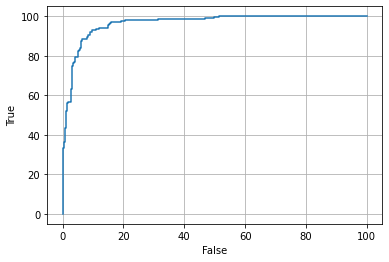

In [28]:
def plot_roc(labels, data):
    predictions = model.predict(data)
    fp, tp, _ = roc_curve(labels,predictions)
    
    plt.plot(100*fp, 100*tp)
    plt.xlabel("False")
    plt.ylabel("True")
    plt.grid()
    plt.show
    
test_labels = np.array([])
num_batches = 0

for _, y in test_gen:
    test_labels = np.append(test_labels, y)
    num_batches += 1
    if num_batches == math.ceil(test_examples / batch_size):
        break
        
plot_roc(test_labels, test_gen)

In [25]:
model.evaluate(test_gen, verbose=2)

17/17 - 4s - loss: 0.2411 - accuracy: 0.9155


[0.24114267528057098, 0.9155470132827759]

In [18]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalu

In [22]:
history.history
import matplotlib.pyplot as plt

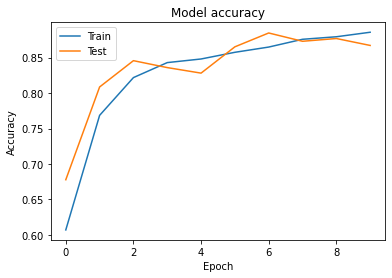

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend((['Train', 'Test']), loc='upper left')
plt.show()

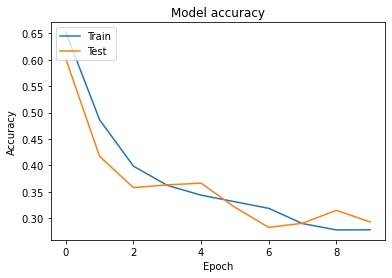

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend((['Train', 'Test']), loc='upper left')
plt.show()